In [ ]:
#!unzip "/content/drive/MyDrive/4 Week - ML batch/Devanagari/Devanagari.zip" -d "/content/drive/MyDrive/Devanagari/"

Archive:  /content/drive/MyDrive/4 Week - ML batch/Devanagari/Devanagari.zip
replace /content/drive/MyDrive/Devanagari/Devanagari/TEST/10/001_01.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from google.colab.patches import cv2_imshow

In [2]:
# Open & Read Devanagari Images
dev_image = Image.open("/content/drive/MyDrive/Devanagari/Devanagari/TRAIN/1/010_09.jpg")
dev_image1 = Image.open("/content/drive/MyDrive/Devanagari/Devanagari/TRAIN/2/010_09.jpg")
dev_image2 = Image.open("/content/drive/MyDrive/Devanagari/Devanagari/TRAIN/3/010_09.jpg")
dev_image3 = Image.open("/content/drive/MyDrive/Devanagari/Devanagari/TRAIN/4/010_09.jpg")
dev_image4 = Image.open("/content/drive/MyDrive/Devanagari/Devanagari/TRAIN/5/010_09.jpg")

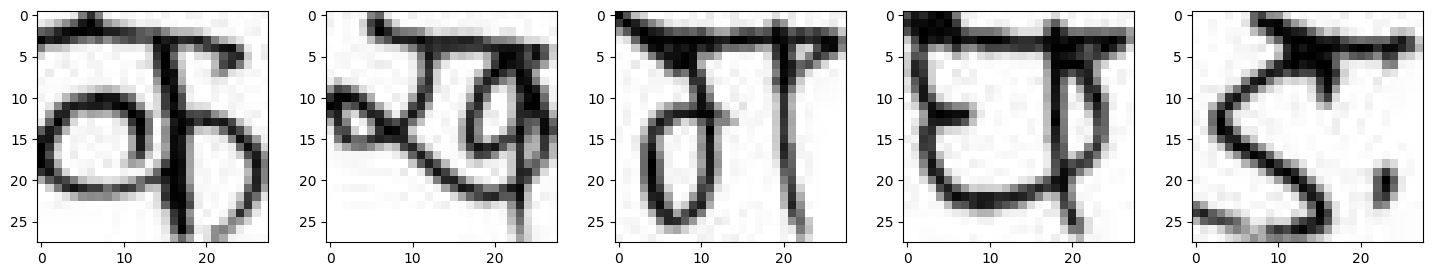

In [3]:
# Let create a subplot to display all five Images
fig = plt.figure(figsize = (18,3))
fig.add_subplot(1, 5, 1)
img_plot = plt.imshow(dev_image, cmap = 'gray')

fig.add_subplot(1, 5, 2)
img_plot = plt.imshow(dev_image1, cmap = 'gray')

fig.add_subplot(1, 5, 3)
img_plot = plt.imshow(dev_image2, cmap = 'gray')

fig.add_subplot(1, 5, 4)
img_plot = plt.imshow(dev_image3, cmap = 'gray')

fig.add_subplot(1, 5, 5)
img_plot = plt.imshow(dev_image4, cmap = 'gray')

In [4]:
train_folder = "/content/drive/MyDrive/Devanagari/Devanagari/TRAIN/"
test_folder = "/content/drive/MyDrive/Devanagari/Devanagari/TEST/"

##### Data Augmentation
    * Augmentation is a process of generating new training samples by pre-processing image data.

In [5]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [6]:
img = load_img(train_folder + '1/010_09.jpg')
data = img_to_array(img)
data

array([[[255., 255., 255.],
        [253., 253., 253.],
        [251., 251., 251.],
        ...,
        [255., 255., 255.],
        [250., 250., 250.],
        [245., 245., 245.]],

       [[234., 234., 234.],
        [217., 217., 217.],
        [184., 184., 184.],
        ...,
        [250., 250., 250.],
        [249., 249., 249.],
        [255., 255., 255.]],

       [[ 96.,  96.,  96.],
        [ 80.,  80.,  80.],
        [ 38.,  38.,  38.],
        ...,
        [247., 247., 247.],
        [243., 243., 243.],
        [255., 255., 255.]],

       ...,

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [212., 212., 212.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [7]:
data.shape
samples = expand_dims(data, 0)
samples.shape

(1, 28, 28, 3)

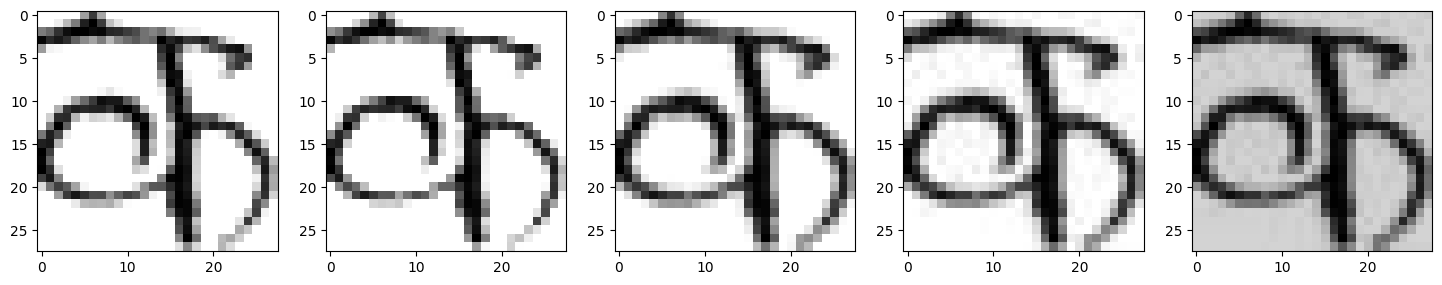

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
datagen = ImageDataGenerator(brightness_range=[0.8,1.5])
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (18,6))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
plt.show()

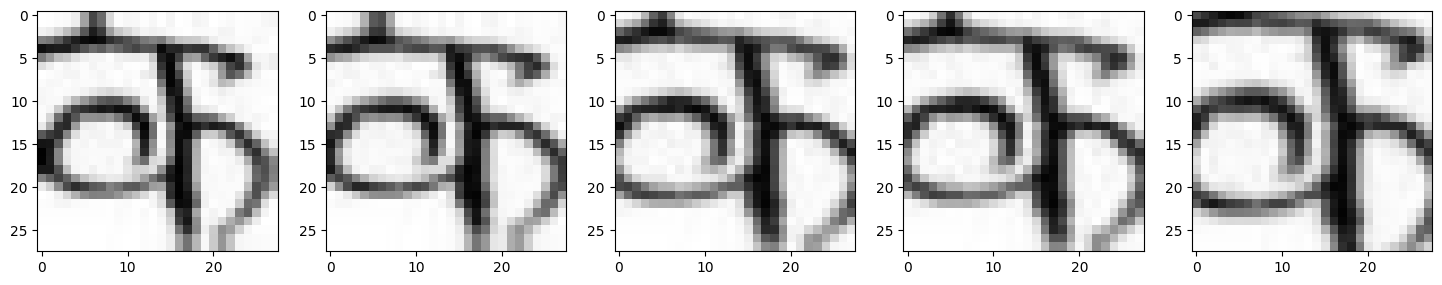

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
# zoom in and zoom out of image data (+- 20%)
datagen = ImageDataGenerator(zoom_range = 0.2)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (18,6))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
plt.show()

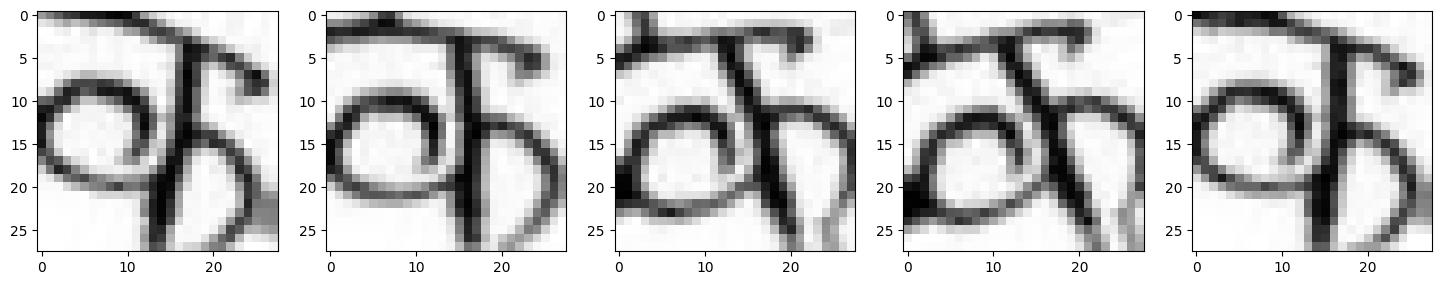

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
# rotating image 20 degree
datagen = ImageDataGenerator(rotation_range=20)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (18,6))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
plt.show()

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, brightness_range=[0.8,1.5], rotation_range=20)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(train_folder, target_size = (64,64), batch_size = 64, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_folder, target_size = (64,64), batch_size = 64, class_mode = 'categorical')

Found 6528 images belonging to 48 classes.
Found 3312 images belonging to 48 classes.


In [13]:
training_set.image_shape

(64, 64, 3)

##### CNN

In [14]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [15]:
def build_model():
    model = Sequential()
    # ConvNet - I
    model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = training_set.image_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    # ConvNet - II
    model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    # ConvNet - III
    model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    # ConvNet - IV
    model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

    # Flatten Matrix
    model.add(Flatten())

    # Fully Connected Layer (FC-Layer)
    model.add(Dense(units = 512, activation = 'relu'))
    model.add(Dense(units = 48, activation = 'softmax'))

    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

    return model

In [16]:
model = build_model()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                        

In [18]:
from tensorflow.keras import callbacks

filepath="/content/drive/MyDrive/DevBest_Model.hdf5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss',save_best_only=True, mode='min',verbose=1)
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(training_set, epochs = 30, shuffle = True, validation_data= test_set,
                    callbacks = callbacks_list, verbose = 1)

Epoch 1/30
102/102 [==============================] - ETA: 0s - loss: 3.5373 - accuracy: 0.2779 
Epoch 1: val_loss improved from inf to 7.25634, saving model to /content/drive/MyDrive/DevBest_Model.hdf5
102/102 [==============================] - 1942s 19s/step - loss: 3.5373 - accuracy: 0.2779 - val_loss: 7.2563 - val_accuracy: 0.0275
Epoch 2/30
102/102 [==============================] - ETA: 0s - loss: 1.1464 - accuracy: 0.6607
Epoch 2: val_loss improved from 7.25634 to 6.94357, saving model to /content/drive/MyDrive/DevBest_Model.hdf5
102/102 [==============================] - 27s 268ms/step - loss: 1.1464 - accuracy: 0.6607 - val_loss: 6.9436 - val_accuracy: 0.0722
Epoch 3/30
102/102 [==============================] - ETA: 0s - loss: 0.6802 - accuracy: 0.7937
Epoch 3: val_loss improved from 6.94357 to 4.78444, saving model to /content/drive/MyDrive/DevBest_Model.hdf5
102/102 [==============================] - 27s 263ms/step - loss: 0.6802 - accuracy: 0.7937 - val_loss: 4.7844 - val_

In [19]:
model.load_weights("/content/drive/MyDrive/DevBest_Model.hdf5")

In [20]:
prediction = np.argmax(model.predict(training_set), axis = 1)

102/102 [==============================] - 1490s 15s/step


##### Make Predictions

In [23]:
y_test = training_set.classes

In [53]:
training_set.class_indices

{'1': 0,
 '10': 1,
 '11': 2,
 '12': 3,
 '13': 4,
 '14': 5,
 '15': 6,
 '16': 7,
 '17': 8,
 '18': 9,
 '19': 10,
 '2': 11,
 '20': 12,
 '21': 13,
 '22': 14,
 '23': 15,
 '24': 16,
 '25': 17,
 '26': 18,
 '27': 19,
 '28': 20,
 '29': 21,
 '3': 22,
 '30': 23,
 '31': 24,
 '32': 25,
 '33': 26,
 '34': 27,
 '35': 28,
 '36': 29,
 '37': 30,
 '38': 31,
 '39': 32,
 '4': 33,
 '40': 34,
 '41': 35,
 '42': 36,
 '43': 37,
 '44': 38,
 '45': 39,
 '46': 40,
 '47': 41,
 '48': 42,
 '5': 43,
 '6': 44,
 '7': 45,
 '8': 46,
 '9': 47}

In [28]:
prediction

array([14, 42, 44, ..., 37, 24, 32])

In [29]:
y_test

array([ 0,  0,  0, ..., 47, 47, 47], dtype=int32)

In [46]:
X_data_new = []
img_new = cv2.imread('/content/drive/MyDrive/Devanagari/Devanagari/TEST/10/001_01.jpg')

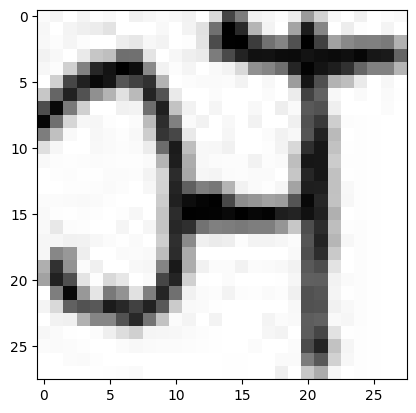

In [47]:
plt.imshow(img_new)

In [48]:
devnagari_new = cv2.resize(img_new, (64, 64))
b, g , r = cv2.split(devnagari_new)
img_new = cv2.merge([r, g, b])
X_data_new.append(img_new)

In [49]:
X_new = np.squeeze(X_data_new)

In [50]:
X_new = X_new.astype('float32')
X_new /= 255

In [51]:
# 1 image, shape of
X_new = X_new.reshape(1, 64, 64, 3)

In [52]:
np.argmax(model.predict(X_new))

1/1 [==============================] - 0s 37ms/step


1